# Data science I

## pandas

![](https://pandas.pydata.org/_static/pandas_logo.png)

> pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language ([pandas-website](https://pandas.pydata.org/index.html)).

Let's say we want to investigate the weather data recorded at the Frankfurt International Airport from the year 2015. The data is available in the tabular CSV format:

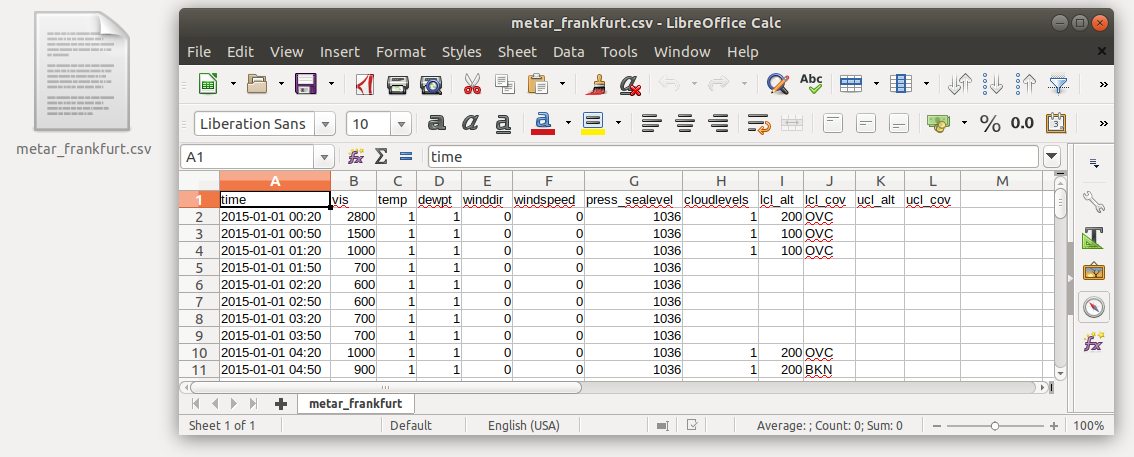

First, we want to read the data:

In [75]:
import pandas as pd
tabelle = pd.read_csv('../data/metar_frankfurt.csv',parse_dates=['time'],index_col="time")

The pandas function `pd.read_csv(...)` opens the csv file and reads its contents. The `parse_dates` argument tells Python to interpret the values in the `time` column as dates and the `index_col` argument tells it to use this column as index.

All data is stored in the `tabelle` object. This object is a so-called **DataFrame**, the basic pandas object. You can think of it like a spreadsheet.

The DataFrame object offers many functions that allow you to work with the data conveniently.

For a first glimps at the data, you can call the `head()` function which prints out the first 5 rows of the table:

In [120]:
tabelle.head()

,vis,temp,dewpt,winddir,windspeed,press_sealevel,cloudlevels,lcl_alt,lcl_cov,ucl_alt,ucl_cov
time,,,,,,,,,,,
2015-01-01 00:20:00,2800.0,1.0,1.0,0.0,0.0,1036.0,1.0,200.0,OVC,NaN,NaN
2015-01-01 00:50:00,1500.0,1.0,1.0,0.0,0.0,1036.0,1.0,100.0,OVC,NaN,NaN
2015-01-01 01:20:00,1000.0,1.0,1.0,0.0,0.0,1036.0,1.0,100.0,OVC,NaN,NaN
2015-01-01 01:50:00,700.0,1.0,1.0,0.0,0.0,1036.0,NaN,NaN,NaN,NaN,NaN
2015-01-01 02:20:00,600.0,1.0,1.0,0.0,0.0,1036.0,NaN,NaN,NaN,NaN,NaN


To get an **overview** of the value distributions of the variables within `tabelle`, you can call the `describe()` function. It generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values:

In [26]:
tabelle.describe()

,vis,temp,dewpt,winddir,windspeed,press_sealevel,cloudlevels,lcl_alt,ucl_alt
count,17520.000000,17507.000000,17507.000000,15615.000000,17519.000000,17507.000000,10210.000000,10210.000000,7743.000000
mean,9421.269977,11.679785,6.006740,169.353186,7.120212,1018.367967,2.056611,2142.938296,8763.786646
std,1839.270055,7.840700,5.574845,95.499760,4.378843,8.490866,0.747168,1371.047900,8246.197043
min,100.000000,-5.000000,-11.000000,0.000000,0.000000,972.000000,1.000000,100.000000,200.000000
25%,10000.000000,5.000000,2.000000,70.000000,4.000000,1014.000000,2.000000,1000.000000,3150.000000
50%,10000.000000,11.000000,6.000000,200.000000,6.000000,1019.000000,2.000000,2000.000000,5500.000000
75%,10000.000000,17.000000,10.000000,230.000000,10.000000,1024.000000,3.000000,3100.000000,10000.000000
max,10000.000000,39.000000,20.000000,360.000000,40.000000,1041.000000,4.000000,8000.000000,30000.000000


The `dtypes` field of `tabelle` shows you all column names and the **data type** of the respective column:

In [27]:
tabelle.dtypes

vis               float64
temp              float64
dewpt             float64
winddir           float64
windspeed         float64
press_sealevel    float64
cloudlevels       float64
lcl_alt           float64
lcl_cov            object
ucl_alt           float64
ucl_cov            object
dtype: object

You can **sort** the table by the values of a specific column, e.g.:

In [28]:
tabelle.sort_values(by='vis')

,vis,temp,dewpt,winddir,windspeed,press_sealevel,cloudlevels,lcl_alt,lcl_cov,ucl_alt,ucl_cov
time,,,,,,,,,,,
2015-11-01 19:20:00,100.0,5.0,5.0,NaN,1.0,1031.0,NaN,NaN,NaN,NaN,NaN
2015-11-13 02:20:00,100.0,4.0,3.0,180.0,1.0,1024.0,1.0,100.0,BKN,NaN,NaN
2015-11-01 19:50:00,100.0,5.0,5.0,NaN,2.0,1031.0,NaN,NaN,NaN,NaN,NaN
2015-11-01 18:50:00,100.0,6.0,5.0,NaN,2.0,1031.0,NaN,NaN,NaN,NaN,NaN
2015-11-01 18:20:00,150.0,6.0,5.0,240.0,3.0,1031.0,NaN,NaN,NaN,NaN,NaN
2015-11-01 07:50:00,150.0,3.0,2.0,140.0,3.0,1032.0,NaN,NaN,NaN,NaN,NaN
2015-12-08 15:50:00,150.0,4.0,4.0,210.0,3.0,1030.0,NaN,NaN,NaN,NaN,NaN
2015-12-08 15:20:00,150.0,4.0,4.0,240.0,3.0,1030.0,NaN,NaN,NaN,NaN,NaN
2015-01-19 02:20:00,150.0,-1.0,-1.0,350.0,4.0,1013.0,NaN,NaN,NaN,NaN,NaN


### Selection by label

When the index of the DataFrame is a range of dates (like in this case), you can **select** one or more **rows** ( = measurement dates) by specifying a date or a date range (as strings):

In [51]:
tabelle.loc["2015-11"] # selects all rows where the date is in November 2015.

,vis,temp,dewpt,winddir,windspeed,press_sealevel,cloudlevels,lcl_alt,lcl_cov,ucl_alt,ucl_cov
time,,,,,,,,,,,
2015-11-01 00:20:00,7000.0,3.0,2.0,80.0,5.0,1030.0,NaN,NaN,NaN,NaN,NaN
2015-11-01 00:50:00,7000.0,3.0,3.0,60.0,6.0,1030.0,NaN,NaN,NaN,NaN,NaN
2015-11-01 01:20:00,6000.0,3.0,2.0,NaN,2.0,1030.0,NaN,NaN,NaN,NaN,NaN
2015-11-01 01:50:00,5000.0,2.0,2.0,NaN,2.0,1030.0,NaN,NaN,NaN,NaN,NaN
2015-11-01 02:20:00,5000.0,4.0,3.0,NaN,2.0,1030.0,NaN,NaN,NaN,NaN,NaN
2015-11-01 02:50:00,5000.0,4.0,4.0,70.0,3.0,1030.0,NaN,NaN,NaN,NaN,NaN
2015-11-01 03:20:00,5000.0,3.0,3.0,80.0,4.0,1030.0,NaN,NaN,NaN,NaN,NaN
2015-11-01 03:50:00,5000.0,3.0,3.0,80.0,7.0,1030.0,NaN,NaN,NaN,NaN,NaN
2015-11-01 04:20:00,6000.0,3.0,3.0,70.0,7.0,1030.0,NaN,NaN,NaN,NaN,NaN


In [52]:
tabelle.loc["2015-11-01 15:55":"2015-11-01 19:20"] # selects all rows between 2015-11-01 15:55 and 2015-11-01 19:20

,vis,temp,dewpt,winddir,windspeed,press_sealevel,cloudlevels,lcl_alt,lcl_cov,ucl_alt,ucl_cov
time,,,,,,,,,,,
2015-11-01 16:20:00,250.0,5.0,5.0,190.0,5.0,1031.0,NaN,NaN,NaN,NaN,NaN
2015-11-01 16:50:00,200.0,6.0,5.0,210.0,4.0,1031.0,NaN,NaN,NaN,NaN,NaN
2015-11-01 17:20:00,200.0,6.0,5.0,220.0,3.0,1031.0,NaN,NaN,NaN,NaN,NaN
2015-11-01 17:50:00,200.0,6.0,5.0,NaN,2.0,1031.0,NaN,NaN,NaN,NaN,NaN
2015-11-01 18:20:00,150.0,6.0,5.0,240.0,3.0,1031.0,NaN,NaN,NaN,NaN,NaN
2015-11-01 18:50:00,100.0,6.0,5.0,NaN,2.0,1031.0,NaN,NaN,NaN,NaN,NaN
2015-11-01 19:20:00,100.0,5.0,5.0,NaN,1.0,1031.0,NaN,NaN,NaN,NaN,NaN


You can **select** one or more **columns** by:

In [38]:
tabelle.loc[:, ['vis','temp']]

,vis,temp
time,,
2015-01-01 00:20:00,2800.0,1.0
2015-01-01 00:50:00,1500.0,1.0
2015-01-01 01:20:00,1000.0,1.0
2015-01-01 01:50:00,700.0,1.0
2015-01-01 02:20:00,600.0,1.0
2015-01-01 02:50:00,600.0,1.0
2015-01-01 03:20:00,700.0,1.0
2015-01-01 03:50:00,700.0,1.0
2015-01-01 04:20:00,1000.0,1.0


And you can also **select columns and rows** together within one call:

In [40]:
tabelle.loc["2015-11-01 15:55":"2015-11-01 19:20", ['vis','temp']]

,vis,temp
time,,
2015-11-01 16:20:00,250.0,5.0
2015-11-01 16:50:00,200.0,6.0
2015-11-01 17:20:00,200.0,6.0
2015-11-01 17:50:00,200.0,6.0
2015-11-01 18:20:00,150.0,6.0
2015-11-01 18:50:00,100.0,6.0
2015-11-01 19:20:00,100.0,5.0


### Selection by position (index)

Just as with the label selection, you can select values via their index using `iloc`:

In [41]:
tabelle.iloc[3:5, 0:2]

,vis,temp
time,,
2015-01-01 01:50:00,700.0,1.0
2015-01-01 02:20:00,600.0,1.0


**Task:**

1. Import pandas and open this file: https://github.com/python-kurs/sommersemester_2019/blob/master/content/data/metar_frankfurt.csv
2. Clip the table to February 01, 2015 and the variables "vis", "temp" and "windspeed"

### Boolean indexing

You can use a single column's values to select data:

In [43]:
tabelle[tabelle.vis < 1000] # Selects all rows where vis < 1000

,vis,temp,dewpt,winddir,windspeed,press_sealevel,cloudlevels,lcl_alt,lcl_cov,ucl_alt,ucl_cov
time,,,,,,,,,,,
2015-01-01 01:50:00,700.0,1.0,1.0,0.0,0.0,1036.0,NaN,NaN,NaN,NaN,NaN
2015-01-01 02:20:00,600.0,1.0,1.0,0.0,0.0,1036.0,NaN,NaN,NaN,NaN,NaN
2015-01-01 02:50:00,600.0,1.0,1.0,0.0,0.0,1036.0,NaN,NaN,NaN,NaN,NaN
2015-01-01 03:20:00,700.0,1.0,1.0,0.0,0.0,1036.0,NaN,NaN,NaN,NaN,NaN
2015-01-01 03:50:00,700.0,1.0,1.0,0.0,0.0,1036.0,NaN,NaN,NaN,NaN,NaN
2015-01-01 04:50:00,900.0,1.0,1.0,0.0,0.0,1036.0,1.0,200.0,BKN,NaN,NaN
2015-01-01 05:20:00,900.0,1.0,1.0,0.0,0.0,1036.0,1.0,200.0,BKN,NaN,NaN
2015-01-01 07:50:00,700.0,1.0,1.0,160.0,4.0,1037.0,NaN,NaN,NaN,NaN,NaN
2015-01-01 08:20:00,700.0,1.0,1.0,NaN,2.0,1038.0,NaN,NaN,NaN,NaN,NaN


You can also use multiple columns to select data after specific criteria:

In [46]:
tabelle[(tabelle.vis < 1000) & (tabelle.temp>5)] # selects all rows where vis < 1000 and temp > 5

,vis,temp,dewpt,winddir,windspeed,press_sealevel,cloudlevels,lcl_alt,lcl_cov,ucl_alt,ucl_cov
time,,,,,,,,,,,
2015-08-29 02:20:00,500.0,15.0,15.0,60.0,4.0,1022.0,2.0,100.0,BKN,300.0,BKN
2015-10-05 01:50:00,400.0,9.0,9.0,10.0,4.0,1016.0,2.0,100.0,SCT,28000.0,BKN
2015-10-05 02:20:00,600.0,9.0,9.0,360.0,5.0,1016.0,2.0,100.0,SCT,28000.0,BKN
2015-10-05 02:50:00,800.0,10.0,9.0,20.0,5.0,1016.0,2.0,100.0,SCT,27000.0,BKN
2015-11-01 15:20:00,500.0,6.0,5.0,200.0,5.0,1031.0,1.0,100.0,OVC,NaN,NaN
2015-11-01 16:50:00,200.0,6.0,5.0,210.0,4.0,1031.0,NaN,NaN,NaN,NaN,NaN
2015-11-01 17:20:00,200.0,6.0,5.0,220.0,3.0,1031.0,NaN,NaN,NaN,NaN,NaN
2015-11-01 17:50:00,200.0,6.0,5.0,NaN,2.0,1031.0,NaN,NaN,NaN,NaN,NaN
2015-11-01 18:20:00,150.0,6.0,5.0,240.0,3.0,1031.0,NaN,NaN,NaN,NaN,NaN


### Operations

DataFrames provide many functions for calculating statistical measures, e.g. the average of each column:

In [69]:
tabelle.mean()

vis               9421.269977
temp                11.679785
dewpt                6.006740
winddir            169.353186
windspeed            7.120212
press_sealevel    1018.367967
cloudlevels          2.056611
lcl_alt           2142.938296
ucl_alt           8763.786646
dtype: float64

You can do the same for single columns, or `Series` as they are called in pandas:

In [70]:
tabelle.vis.mean()

9421.26997716895

And of course, you can combine all of the above:

In [74]:
tabelle[tabelle.vis < 1000].windspeed.median() # Calculate the median wind speed for times when the visibility was below 1000m

3.0

You can also **apply** specific functions to a Series or along an axis of a DataFrame object using the `apply()` method:

In [79]:
# First we define the function
def do_sth(x):
    return (x + 5) ** 2

# then we apply it:
tabelle.temp.apply(do_sth)

time
2015-01-01 00:20:00     36.0
2015-01-01 00:50:00     36.0
2015-01-01 01:20:00     36.0
2015-01-01 01:50:00     36.0
2015-01-01 02:20:00     36.0
2015-01-01 02:50:00     36.0
2015-01-01 03:20:00     36.0
2015-01-01 03:50:00     36.0
2015-01-01 04:20:00     36.0
2015-01-01 04:50:00     36.0
2015-01-01 05:20:00     36.0
2015-01-01 05:50:00     36.0
2015-01-01 06:20:00     36.0
2015-01-01 06:50:00     36.0
2015-01-01 07:20:00     36.0
2015-01-01 07:50:00     36.0
2015-01-01 08:20:00     36.0
2015-01-01 08:50:00     36.0
2015-01-01 09:20:00     49.0
2015-01-01 09:50:00     49.0
2015-01-01 10:20:00     49.0
2015-01-01 10:50:00     49.0
2015-01-01 11:20:00     49.0
2015-01-01 11:50:00     64.0
2015-01-01 12:20:00     64.0
2015-01-01 12:50:00     64.0
2015-01-01 13:20:00     64.0
2015-01-01 13:50:00     64.0
2015-01-01 14:20:00     64.0
2015-01-01 14:50:00     64.0
                       ...  
2015-12-31 09:20:00     64.0
2015-12-31 09:50:00     64.0
2015-12-31 10:20:00     64.0
2015-12-3

**Task:**

1. Calculate the maximum wind speed for wind directions between 225° and 315° (West wind)
2. Calculate the average wind speed for times when the horizontal visibility (vis) was below/above 1000m. Which one is higher? Do you have an idea, why?

### Resampling

Another often needed functionality when working with time series data is provided by the `resample()` method. You can use it to resample your data to different temporal resolutions.

The `resample()` function returns a [Resampler](https://pandas.pydata.org/pandas-docs/stable/reference/resampling.html) object which in turn provides many functions for the specific resampling method.

For example, we can average the Frankfurt Aiport data on a 3 hour interval:

In [101]:
tabelle.resample('3H').mean()

,vis,temp,dewpt,winddir,windspeed,press_sealevel,cloudlevels,lcl_alt,ucl_alt
time,,,,,,,,,
2015-01-01 00:00:00,1200.000000,1.000000,1.000000,0.000000,0.000000,1036.000000,1.000000,133.333333,NaN
2015-01-01 03:00:00,916.666667,1.000000,1.000000,0.000000,0.000000,1036.000000,1.000000,200.000000,NaN
2015-01-01 06:00:00,983.333333,1.000000,1.000000,155.000000,2.666667,1037.333333,1.750000,850.000000,1166.666667
2015-01-01 09:00:00,1016.666667,2.166667,1.666667,228.333333,4.333333,1036.666667,2.000000,300.000000,1200.000000
2015-01-01 12:00:00,2100.000000,3.000000,2.000000,198.000000,4.000000,1035.500000,2.500000,566.666667,1433.333333
2015-01-01 15:00:00,2983.333333,3.000000,2.000000,191.666667,6.000000,1035.333333,2.833333,516.666667,1866.666667
2015-01-01 18:00:00,5083.333333,2.833333,1.666667,195.000000,7.666667,1034.333333,2.000000,550.000000,1216.666667
2015-01-01 21:00:00,8500.000000,2.000000,1.000000,216.666667,8.833333,1033.000000,1.333333,666.666667,900.000000
2015-01-02 00:00:00,9000.000000,1.500000,0.500000,205.000000,11.500000,1030.666667,1.000000,650.000000,NaN


But we are not limited to calculating the mean over these intervals. We can also calculate the sum or any other function we like:

In [100]:
tabelle.resample('3H').sum()

,vis,temp,dewpt,winddir,windspeed,press_sealevel,cloudlevels,lcl_alt,ucl_alt
time,,,,,,,,,
2015-01-01 00:00:00,7200.0,6.0,6.0,0.0,0.0,6216.0,3.0,400.0,0.0
2015-01-01 03:00:00,5500.0,6.0,6.0,0.0,0.0,6216.0,4.0,800.0,0.0
2015-01-01 06:00:00,5900.0,6.0,6.0,620.0,16.0,6224.0,7.0,3400.0,3500.0
2015-01-01 09:00:00,6100.0,13.0,10.0,1370.0,26.0,6220.0,6.0,900.0,3600.0
2015-01-01 12:00:00,12600.0,18.0,12.0,990.0,24.0,6213.0,15.0,3400.0,8600.0
2015-01-01 15:00:00,17900.0,18.0,12.0,1150.0,36.0,6212.0,17.0,3100.0,11200.0
2015-01-01 18:00:00,30500.0,17.0,10.0,1170.0,46.0,6206.0,12.0,3300.0,7300.0
2015-01-01 21:00:00,51000.0,12.0,6.0,1300.0,53.0,6198.0,8.0,4000.0,1800.0
2015-01-02 00:00:00,54000.0,9.0,3.0,1230.0,69.0,6184.0,6.0,3900.0,0.0


We can also resample to a higher temporal resolution than the original data set and provide an interpolation technique for time steps between known measurement points:

In [119]:
tabelle.temp.resample('10Min').interpolate("linear")

time
2015-01-01 00:20:00    1.0
2015-01-01 00:30:00    1.0
2015-01-01 00:40:00    1.0
2015-01-01 00:50:00    1.0
2015-01-01 01:00:00    1.0
2015-01-01 01:10:00    1.0
2015-01-01 01:20:00    1.0
2015-01-01 01:30:00    1.0
2015-01-01 01:40:00    1.0
2015-01-01 01:50:00    1.0
2015-01-01 02:00:00    1.0
2015-01-01 02:10:00    1.0
2015-01-01 02:20:00    1.0
2015-01-01 02:30:00    1.0
2015-01-01 02:40:00    1.0
2015-01-01 02:50:00    1.0
2015-01-01 03:00:00    1.0
2015-01-01 03:10:00    1.0
2015-01-01 03:20:00    1.0
2015-01-01 03:30:00    1.0
2015-01-01 03:40:00    1.0
2015-01-01 03:50:00    1.0
2015-01-01 04:00:00    1.0
2015-01-01 04:10:00    1.0
2015-01-01 04:20:00    1.0
2015-01-01 04:30:00    1.0
2015-01-01 04:40:00    1.0
2015-01-01 04:50:00    1.0
2015-01-01 05:00:00    1.0
2015-01-01 05:10:00    1.0
                      ... 
2015-12-31 19:00:00    5.0
2015-12-31 19:10:00    5.0
2015-12-31 19:20:00    5.0
2015-12-31 19:30:00    5.0
2015-12-31 19:40:00    5.0
2015-12-31 19:50:00    

Although pandas has the ability to plot the data in graphs as well, we use specific plotting libraries for this purpose. There are many plotting libraries for virtually any data visualization need. Some of these libraries can be used regardless of the specific application, but many of them are intensely focused on accomplishing a particular task. A good overview is given on the [FusionCharts Blog](https://www.fusioncharts.com/blog/best-python-data-visualization-libraries/).

Here we will focus on the most basic (and oldest) plotting library called "**matplotlib**":

## matplotlib

![](https://matplotlib.org/_static/logo2.png)

## Exercise 4

- Complete the fourth assignment and push your results until tuesday 14:00 next week